<a href="https://colab.research.google.com/github/streakcraze/PRODIGY_ML_03/blob/main/comparison_with_1Dneuralnet_(with_pca).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data Acquisition

In [1]:
import shutil

shutil.unpack_archive("/content/drive/MyDrive/Colab Notebooks/image-classification-using-svm/dogs-vs-cats/train.zip")

In [2]:
import os

train_images_list = sorted(os.listdir("train"))

print(f"the train dataset has {len(train_images_list)} images")

the train dataset has 25000 images


In [3]:
print(train_images_list[0])
print(train_images_list[-1])

cat.0.jpg
dog.9999.jpg


In [4]:
import re

cat_images = [x for x in train_images_list if re.match("cat", x)]
dog_images = [x for x in train_images_list if re.match("dog", x)]

print(f"{len(cat_images)} cat images")
print(f"{len(dog_images)} dog images")

12500 cat images
12500 dog images


# 2. Data Preprocessing

In [5]:
import numpy as np
from skimage import io, color, transform
import matplotlib.pyplot as plt
import gc

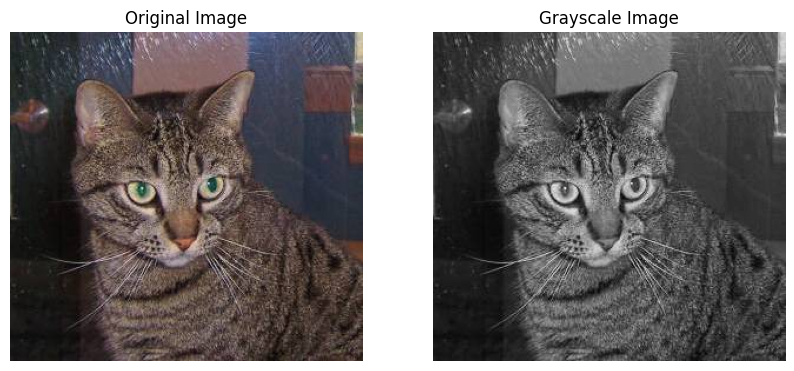

In [6]:
cat_img = io.imread(os.path.join("train", cat_images[1]))
cat_gray = color.rgb2gray(cat_img)

# plotting the original and grayscale images side by side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cat_img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cat_gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.show()

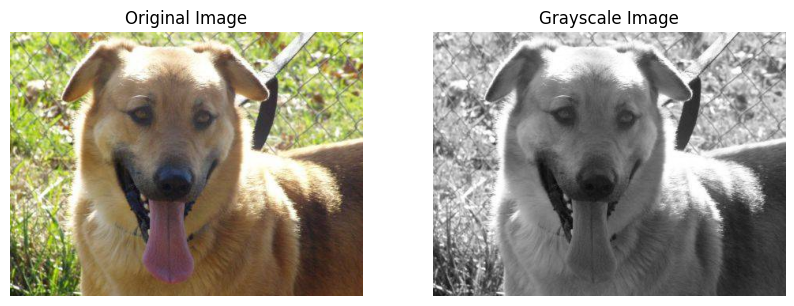

In [7]:
dog_img = io.imread(os.path.join("train", dog_images[10000]))
dog_gray = color.rgb2gray(dog_img)

# plotting the original and grayscale images side by side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(dog_img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(dog_gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.show()

In [8]:
features = np.array([])
# "0" for cat and "1" for dog
labels = np.append(np.full(12500, 0), np.full(12500, 1))

In [9]:
cat_features = []

print("loading cat images ...")

for img in cat_images:
  # load the RGB image
  rgb_img = io.imread(os.path.join("train", img))
  # convert RGB to grayscale
  gray_img = color.rgb2gray(rgb_img)
  # resize the image
  resized_img = transform.resize(gray_img, (50, 50))
  # normalize the image
  normalized_img = resized_img / 255.0
  # flatten the image array
  flat_img = normalized_img.flatten()
  # append to features list
  cat_features.append(flat_img)

features = np.vstack(cat_features)
del cat_features
gc.collect()
print("loaded cat images successfully")

loading cat images ...
loaded cat images successfully


In [10]:
dog_features = []

print("loading dog images ...")

for img in dog_images:
  # load the RGB image
  rgb_img = io.imread(os.path.join("train", img))
  # convert RGB to grayscale
  gray_img = color.rgb2gray(rgb_img)
  # resize the image
  resized_img = transform.resize(gray_img, (50, 50))
  # normalize the image
  normalized_img = resized_img / 255.0
  # flatten the image array
  flat_img = normalized_img.flatten()
  # append to features list
  dog_features.append(flat_img)

features = np.append(features, dog_features, axis=0)
del dog_features
gc.collect()
print("loaded dog images successfully")

loading dog images ...
loaded dog images successfully


In [11]:
from sklearn.decomposition import PCA

In [12]:
print("applying principal component analysis ...")
pca = PCA(n_components=0.9)
pca.fit(features)

principal_features = pca.transform(features)
print(f"features reduced from {len(features[0])} to {len(principal_features[0])}")

del features
gc.collect()
print("principal component analysis completed")

applying principal component analysis ...
features reduced from 2500 to 100
principal component analysis completed


# 3. Model Training

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
print("splitting data into training and test sets")
x_train, x_test, y_train, y_test = train_test_split(principal_features, labels, test_size=0.3, random_state=77, stratify=labels)
del principal_features
del labels
gc.collect()
print("split completed")

splitting data into training and test sets
split completed


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import joblib

In [16]:
model = Sequential()

# Input layer
model.add(Dense(128, input_shape=(pca.n_components_,), activation='relu'))

# Hidden layers
model.add(Dense(64, activation='relu'))

# Output layer with 1 neuron and sigmoid activation function for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               12928     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 21249 (83.00 KB)
Trainable params: 21249 (83.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
print("model training started")
# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32)

joblib.dump(model, "/content/drive/MyDrive/Colab Notebooks/image-classification-using-svm/image_classifier_1Dneuralnet(1).sav")
del x_train
del y_train
gc.collect()
print("model artifact saved")

model training started
Epoch 1/10
547/547 [==============================] - 2s 2ms/step - loss: 0.6888 - accuracy: 0.5421
Epoch 2/10
547/547 [==============================] - 1s 2ms/step - loss: 0.6659 - accuracy: 0.5966
Epoch 3/10
547/547 [==============================] - 1s 2ms/step - loss: 0.6512 - accuracy: 0.6178
Epoch 4/10
547/547 [==============================] - 1s 2ms/step - loss: 0.6456 - accuracy: 0.6264
Epoch 5/10
547/547 [==============================] - 1s 3ms/step - loss: 0.6395 - accuracy: 0.6324
Epoch 6/10
547/547 [==============================] - 2s 3ms/step - loss: 0.6350 - accuracy: 0.6391
Epoch 7/10
547/547 [==============================] - 2s 3ms/step - loss: 0.6325 - accuracy: 0.6402
Epoch 8/10
547/547 [==============================] - 2s 3ms/step - loss: 0.6272 - accuracy: 0.6449
Epoch 9/10
547/547 [==============================] - 1s 2ms/step - loss: 0.6244 - accuracy: 0.6473
Epoch 10/10
547/547 [==============================] - 1s 2ms/step - loss: 0.

# 4. Model Evaluation

In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [19]:
# testing the model
y_pred = model.predict(x_test)
binary_y_pred = (y_pred > 0.5).astype(int)

# calculating the accuracy of the model
accuracy = accuracy_score(binary_y_pred, y_test)
print(f"The model is {accuracy*100}% accurate")

235/235 [==============================] - 0s 2ms/step
The model is 62.586666666666666% accurate


In [20]:
# printing the classification report
print("Classification report:")
print(classification_report(y_test, binary_y_pred, target_names=['cat', 'dog']))

Classification report:
              precision    recall  f1-score   support

         cat       0.64      0.57      0.60      3750
         dog       0.61      0.68      0.65      3750

    accuracy                           0.63      7500
   macro avg       0.63      0.63      0.62      7500
weighted avg       0.63      0.63      0.62      7500



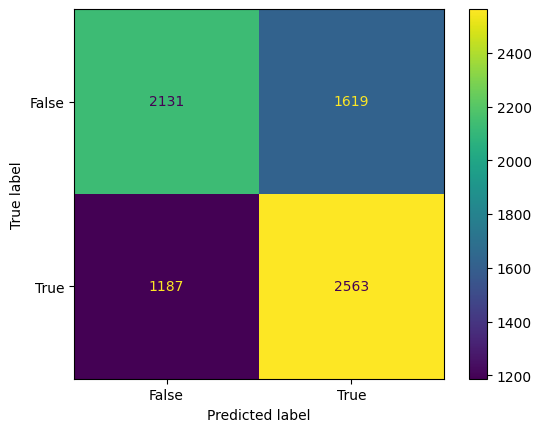

In [21]:
# plotting the confusion matrix
cm = confusion_matrix(y_test, binary_y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
cm_display.plot()
plt.show()

In [22]:
shutil.unpack_archive("/content/drive/MyDrive/Colab Notebooks/image-classification-using-svm/dogs-vs-cats/test1.zip")

In [23]:
test_images_list = sorted(os.listdir("test1"))

print(f"the test dataset has {len(test_images_list)} images")

the test dataset has 12500 images


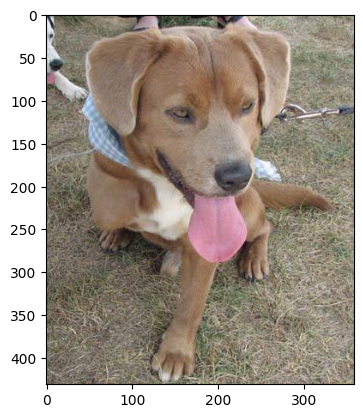

1/1 [==============================] - 0s 56ms/step
Model says it is a dog


In [24]:
test_img = io.imread(os.path.join("test1", test_images_list[500]))

plt.imshow(test_img)
plt.show()

gray_test_img = color.rgb2gray(test_img)
resized_test_img = transform.resize(gray_test_img, (50, 50))
normalized_test_img = resized_test_img / 255.0
flat_test_img = normalized_test_img.flatten()

transformed_sample = pca.transform([flat_test_img])

img_pred = model.predict(transformed_sample)

if(img_pred > 0.5):
    print("Model says it is a dog")
else:
    print("Model says it is a cat")
